In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('sample_data_v4.csv')
pd.set_option('display.max_rows', 5000)
df.head(1)

Application ID Current City              Other skills  \
0         MS0001         Pune  Machine Learning, Python   

                           Institute                         Degree  \
0  Don Bosco Institute of Technology  Bachelor of Engineering (B.E)   

                   Stream  Current Year Of Graduation Performance_PG  \
0  Mechanical Engineering                        2018            NaN   

  Performance_UG Performance_12 Performance_10  
0        8.13/10            NaN            NaN

In [3]:
df.isna().sum()

Application ID                   0
Current City                     0
Other skills                    38
Institute                       13
Degree                          85
Stream                          97
Current Year Of Graduation       0
Performance_PG                1817
Performance_UG                 334
Performance_12                 780
Performance_10                 880
dtype: int64

In [4]:
#Remove space from the coulmn
df.columns =df.columns.str.replace(' ','_')
df.head(1)

Application_ID Current_City              Other_skills  \
0         MS0001         Pune  Machine Learning, Python   

                           Institute                         Degree  \
0  Don Bosco Institute of Technology  Bachelor of Engineering (B.E)   

                   Stream  Current_Year_Of_Graduation Performance_PG  \
0  Mechanical Engineering                        2018            NaN   

  Performance_UG Performance_12 Performance_10  
0        8.13/10            NaN            NaN

In [5]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

Other_skills: 0.0175% missing values
Institute: 0.006% missing values
Degree: 0.0392% missing values
Stream: 0.0447% missing values
Performance_PG: 0.8381% missing values
Performance_UG: 0.1541% missing values
Performance_12: 0.3598% missing values
Performance_10: 0.4059% missing values


In [6]:
pg=df['Performance_10'].str.split("/" ,expand=True)
df['Performance_10']=pg[0]

pg=df['Performance_12'].str.split("/" ,expand=True)
df['Performance_12']=pg[0]

pg=df['Performance_UG'].str.split("/" ,expand=True)
df['Performance_UG']=pg[0]

pg=df['Performance_PG'].str.split("/" ,expand=True)
df['Performance_PG']=pg[0]

df['Performance_10'] = df['Performance_10'].astype(float)
df['Performance_12'] = df['Performance_12'].astype(float)

df['Performance_10'].fillna((df['Performance_10'].mean()), inplace=True)
df['Performance_12'].fillna((df['Performance_12'].mean()), inplace=True)
df['Performance_UG'].fillna(0, inplace=True)
df['Performance_PG'].fillna(0, inplace=True)


Application_ID        Current_City  \
0            MS0001                Pune   
1            MS0002                Pune   
2            MS0003         Navi Mumbai   
3            MS0004           Bangalore   
4            MS0005              Mumbai   
5            MS0006               Delhi   
6            MS0007              Howrah   
7            MS0008              Pandua   
8            MS0009                Pune   
9            MS0010              Mumbai   
10           MS0011                Pune   
11           MS0012           Bangalore   
12           MS0013               Delhi   
13           MS0014            Varanasi   
14           MS0015        Vizianagaram   
15           MS0016           Kharagpur   
16           MS0017           Kharagpur   
17           MS0018             Gwalior   
18           MS0019              Kanpur   
19           MS0020             Nellore   
20           MS0021           Raebareli   
21           MS0022               Delhi   
22           MS0023          Aurangabad   
23           MS0024               Delhi   
24           MS0025             Mathura   
25           MS0026                Pune   
26           MS0027           Hyderabad   
27           MS0028           Bangalore   
28           MS0029               Delhi   
29           MS0030               Noida   
30           MS0031               Delhi   
31           MS0032           Ghaziabad   
32           MS0033               Delhi   
33           MS0034               Delhi   
34           MS0035               Delhi   
35           MS0036            Dehradun   
36           MS0037               Delhi   
37           MS0038            Arambagh   
38           MS0039                Pune   
39           MS0040           Kharagpur   
40           MS0041            Guwahati   
41           MS0042               Delhi   
42           MS0043          Vijayawada   
43           MS0044              Mysuru   
44           MS0045              Mumbai   
45           MS0046               Delhi   
46           MS0047               Delhi   
47           MS0048               Delhi   
48           MS0049             Chennai   
49           MS0050           Ghaziabad   
50           MS0051           Ahmedabad   
51           MS0052               Delhi   
52           MS0053            Bambolim   
53           MS0054               Delhi   
54           MS0055            Warangal   
55           MS0056           Ghaziabad   
56           MS0057                Agra   
57           MS0058               Delhi   
58           MS0059               Delhi   
59           MS0060             Roorkee   
60           MS0061               Delhi   
61           MS0062           Ahmedabad   
62           MS0063               Delhi   
63           MS0064                Pune   
64           MS0065               Delhi   
65           MS0066               Noida   
66           MS0067            Dehradun   
67           MS0068           Kharagpur   
68           MS0069               Surat   
69           MS0070           Ghaziabad   
70           MS0071               Delhi   
71           MS0072               Delhi   
72           MS0073                Pune   
73           MS0074               Delhi   
74           MS0075           Bangalore   
75           MS0076               Delhi   
76           MS0077           Faridabad   
77           MS0078            Hamirpur   
78           MS0079            Banglore   
79           MS0080               Delhi   
80           MS0081              Indore   
81           MS0082         Bhubaneswar   
82           MS0083               Delhi   
83           MS0084           Hyderabad   
84           MS0085               Delhi   
85           MS0086           Bharatpur   
86           MS0087                Pune   
87           MS0088               Delhi   
88           MS0089                Pune   
89           MS0090           Hyderabad   
90           MS0091                Pune   
91           MS0092         Bhubaneswar   
92    

In [7]:
df["Current_City"].value_counts()

Bangalore             635
Delhi                 183
Hyderabad             149
Pune                  111
Mumbai                 96
Chennai                77
Kolkata                56
Banglore               39
Noida                  39
Jaipur                 28
Bhubaneswar            27
Indore                 27
Kharagpur              24
Ghaziabad              24
Varanasi               23
Visakhapatnam          17
Nagpur                 17
Ahmedabad              17
Lucknow                17
Kanpur                 14
Chandigarh             13
New Delhi              13
Jalandhar              12
Navi Mumbai            12
Thrissur               12
Gurugram               11
Dehradun               11
Coimbatore             11
Vellore                11
Dhanbad                10
Bhopal                  9
Vijayawada              9
Jabalpur                9
Greater Noida           9
Roorkee                 8
Hamirpur                8
Vadodara                8
Faridabad               8
Gwalior     

In [8]:
#We have some miss entries in city names
#So we convert Mangaluru to Mangalore, Banglore to Bangalore, Vasai-Virar to Virar
df.Current_City.replace(['Mangaluru'],['Mangalore'] , inplace=True)
df.Current_City.replace(['Banglore'],['Bangalore'] , inplace=True)
df.Current_City.replace(['Vasai-Virar'],['Virar'] , inplace=True)

## As Internship is WFH I am assuming city will not be a barrior

In [10]:
#We have some miss entries in Degree names
#So we convert Master of Science (M.S.) to Master of Science (M.Sc), Integrated B.S. & M.S. as Integrated B.Sc. & M.Sc., Bachelor of Science (B.S) as Bachelor of Science (B.Sc)
df.Degree.replace(['Master of Science (M.S.)'],['Master of Science (M.Sc)'] , inplace=True)
df.Degree.replace(['Integrated B.S. & M.S.'],['Integrated B.Sc. & M.Sc.'] , inplace=True)
df.Degree.replace(['Bachelor of Science (B.S)'],['Bachelor of Science (B.Sc)'] , inplace=True)
df.Degree.replace(['Integrated B.Tech & M.S.'],['Integrated B.Tech & M.Sc'] , inplace=True)

In [12]:
#We have some miss entries in Streams names
df = df.replace({'Stream':{'Computer Science & Engineering Specialization In Information Security':'CSE','Advanced Computer Science':'CSE','Software Engineering':'CSE','Computer Science &amp;engineering':'CSE','Computer Science & Engineering (CSE)':'CSE','Computer  Science And Technology':'CSE','Computer Science And Enigneering':'CSE','Computer Science &amp;Engineering (CSE)':'CSE','Computer Science And  Engineering':'CSE','Computer Science & Engineering':'CSE','Computer Science  Engineering':'CSE','Computer Science And Engineering(CSE)':'CSE','Engineering (CSE)':'CSE','Computer Science And System Engineering':'CSE','Computer Science And System Engineeringg':'CSE','Computer  Science' : 'CSE','computer science' : 'CSE','Computer  Science And Engineering': 'CSE','Computer Science AndEngineering':'CSE','cs':'CSE','Computer Technology':'CSE','Computer Application':'CSE'}})
df = df.replace({'Stream':{'Information Systems':'IT','IT And Neurology (minor)':'IT','Information Technology':'IT','Information Technology (IT)':'IT','Information Technology(I.T)':'IT','Information Science':'CSE'}})
df = df.replace({'Stream':{'Data Science':'DS','Machine Learning':'DS','Computer Science(Specialization In Data Analytics)':'DS','Data Analytics':'DS','Big Data Analytics':'DS','Data Analytics And Decision Science':'DS','Data Science And Analytics':'DS','Data Science And Machine Learning':'DS','Data Science And Engineering':'DS','Data Science Engineering':'DS','Computer Science & Engineering Specialization In Data Analytics':'DS','PG Diploma In Data Science':'DS','Advanced Diploma In BigData Analytics':'DS','Data Analyst':'DS','Business Analytics And Big Data':'DS','Finance And Data Analytics':'DS','Machine Learning, Deep Learning,  BigData':'DS','Data Science With Python':'DS','Data Science And Data Analytical':'DS','Data Science, Data Analytics, Big Data':'DS','Computer Science With The Specialization In Data Science':'DS','Advance Diploma In Big Data Analytics':'DS','Advanced Big Data Analytics':'DS','Business Analytics':'DS','Mathematics and Computing':'DS','Artificial Intelligence':'DS','Applied Statistics And Informatics':'DS','Machine Learning And Artificial Intelligence':'DS','TENSORFLOW IN PRACTICE SPECIALIZATION':'DS','Applied Statistics':'DS','Applied Mathematics':'DS','Statistics':'DS','Inetgrated Msc Student Of Mathematics':'DS','Computer Science And Mathematics':'DS','Big Data Analysis':'DS'}})
df = df.replace({'Stream':{'Electronics and Communication':'EE','Electronics and Telecommunication Engineering':'EE','Digital Electronics And Communication Engineering':'EE','Electronics Engineering':'EE','Electrical Engineering':'EE'}})
df = df.replace({'Stream':{'Mechanical Engineering':'ME'}})
df = df.replace({'Stream':{'Chemical Engineering':'CE'}})

In [14]:
df.Current_Year_Of_Graduation.unique()

array([2018, 2020, 2022, 2021,    0, 2017, 2023, 2019, 2006, 2013, 2014,
       2024, 2016, 2007, 2015, 2011, 2010, 2012, 2005, 2009, 2004, 2008],
      dtype=int64)

In [15]:
#Experience (yrs after graduation)
df['exp'] = df.Current_Year_Of_Graduation.apply (lambda x: x if x < 1 else 2020 - x)
df['exp'] = df.exp.apply (lambda x: x if x > 0 else 0)

Application_ID        Current_City  \
0            MS0001                Pune   
1            MS0002                Pune   
2            MS0003         Navi Mumbai   
3            MS0004           Bangalore   
4            MS0005              Mumbai   
5            MS0006               Delhi   
6            MS0007              Howrah   
7            MS0008              Pandua   
8            MS0009                Pune   
9            MS0010              Mumbai   
10           MS0011                Pune   
11           MS0012           Bangalore   
12           MS0013               Delhi   
13           MS0014            Varanasi   
14           MS0015        Vizianagaram   
15           MS0016           Kharagpur   
16           MS0017           Kharagpur   
17           MS0018             Gwalior   
18           MS0019              Kanpur   
19           MS0020             Nellore   
20           MS0021           Raebareli   
21           MS0022               Delhi   
22           MS0023          Aurangabad   
23           MS0024               Delhi   
24           MS0025             Mathura   
25           MS0026                Pune   
26           MS0027           Hyderabad   
27           MS0028           Bangalore   
28           MS0029               Delhi   
29           MS0030               Noida   
30           MS0031               Delhi   
31           MS0032           Ghaziabad   
32           MS0033               Delhi   
33           MS0034               Delhi   
34           MS0035               Delhi   
35           MS0036            Dehradun   
36           MS0037               Delhi   
37           MS0038            Arambagh   
38           MS0039                Pune   
39           MS0040           Kharagpur   
40           MS0041            Guwahati   
41           MS0042               Delhi   
42           MS0043          Vijayawada   
43           MS0044              Mysuru   
44           MS0045              Mumbai   
45           MS0046               Delhi   
46           MS0047               Delhi   
47           MS0048               Delhi   
48           MS0049             Chennai   
49           MS0050           Ghaziabad   
50           MS0051           Ahmedabad   
51           MS0052               Delhi   
52           MS0053            Bambolim   
53           MS0054               Delhi   
54           MS0055            Warangal   
55           MS0056           Ghaziabad   
56           MS0057                Agra   
57           MS0058               Delhi   
58           MS0059               Delhi   
59           MS0060             Roorkee   
60           MS0061               Delhi   
61           MS0062           Ahmedabad   
62           MS0063               Delhi   
63           MS0064                Pune   
64           MS0065               Delhi   
65           MS0066               Noida   
66           MS0067            Dehradun   
67           MS0068           Kharagpur   
68           MS0069               Surat   
69           MS0070           Ghaziabad   
70           MS0071               Delhi   
71           MS0072               Delhi   
72           MS0073                Pune   
73           MS0074               Delhi   
74           MS0075           Bangalore   
75           MS0076               Delhi   
76           MS0077           Faridabad   
77           MS0078            Hamirpur   
78           MS0079           Bangalore   
79           MS0080               Delhi   
80           MS0081              Indore   
81           MS0082         Bhubaneswar   
82           MS0083               Delhi   
83           MS0084           Hyderabad   
84           MS0085               Delhi   
85           MS0086           Bharatpur   
86           MS0087                Pune   
87           MS0088               Delhi   
88           MS0089                Pune   
89           MS0090           Hyderabad   
90           MS0091                Pune   
91           MS0092         Bhubaneswar   
92    

## Pivot_Table

In [16]:
pd.pivot_table(df, index = 'Current_City', values = 'exp').sort_values('exp', ascending = False)

exp
Current_City                
Zurich              8.000000
Indi                5.000000
Nashik              4.000000
Akola               4.000000
Kannur              3.666667
Allahabad           3.000000
Gulbarga            3.000000
Rajapalayam         3.000000
Bathinda            2.500000
Thrissur            2.083333
Karjat              2.000000
Rosenheim           2.000000
Bangalore           1.787834
Hyderabad           1.711409
Vasco Da Gama       1.500000
Kurnool             1.500000
Noida               1.358974
Pimpri-Chinchwad    1.333333
Pune                1.324324
Navi Mumbai         1.166667
Kochi               1.000000
Ado Ekiti           1.000000
Mahé                1.000000
Bidrahalli          1.000000
Palghar             1.000000
Pathanamthitta      1.000000
Surat               1.000000
Gangtok             1.000000
Bilaspur            1.000000
Kozhikode           1.000000
Visakhapatnam       0.941176
Ghaziabad           0.875000
Gurgaon             0.857143
Tirupati            0.800000
Nagpur              0.764706
Agartala            0.750000
Mumbai              0.739583
Kolkata             0.714286
Kolhapur            0.666667
Ernakulam           0.666667
Bhopal              0.666667
Bokaro Steel City   0.666667
Greater Noida       0.555556
Belgaum             0.500000
Rourkela            0.500000
Dhanbad             0.400000
Chennai             0.389610
Delhi               0.355191
Lucknow             0.352941
Durgapur            0.333333
Nellore             0.333333
Ahmedabad           0.294118
Coimbatore          0.272727
Indore              0.259259
Dharwad             0.250000
Faridabad           0.250000
Vijayawada          0.222222
Kanpur              0.214286
Mysuru              0.200000
Gurugram            0.181818
Vellore             0.181818
New Delhi           0.153846
Jaipur              0.107143
Kharagpur           0.083333
Chandigarh          0.076923
Bhubaneswar         0.074074
Ranchi              0.000000
Rajkot              0.000000
Roorkee             0.000000
Ajmer               0.000000
Raigarh             0.000000
Ahmednagar          0.000000
Rudrapur            0.000000
Salem               0.000000
Raebareli           0.000000
Alappuzha           0.000000
Pantnagar           0.000000
Prayagraj           0.000000
Pandua              0.000000
Nizamabad           0.000000
Annur Mettupalayam  0.000000
Ooty                0.000000
Pala                0.000000
Ambasamudram        0.000000
Palwal              0.000000
Panaji              0.000000
Panipat             0.000000
Aligarh             0.000000
Sancoale            0.000000
Alwar               0.000000
Patiala             0.000000
Patna               0.000000
Phagwara            0.000000
Pilani              0.000000
Pilkhuwa            0.000000
Sambalpur           0.000000
Solan               0.000000
Sangareddy          0.000000
Thiruvananthapuram  0.000000
Tiruchirappalli     0.000000
Tiruppur            0.000000
Trichey             0.000000
Udaipur             0.000000
Ujire               0.000000
Uppinangady         0.000000
Vadodara            0.000000
Valsad              0.000000
Varanasi            0.000000
Virar               0.000000
Vizianagaram        0.000000
Walajapet           0.000000
Warangal            0.000000
Wardha              0.000000
Yamuna Nagar        0.000000
Yavatmal            0.000000
Yogyakarta City     0.000000
Agra                0.000000
Thanjavur           0.000000
Sathyamangalam      0.000000
Thane               0.000000
Satna               0.000000
Secunderabad        0.000000
Shamli              0.000000
Shillong            0.000000
Shirpur             0.000000
Shirpur-Warwade     0.000000
Sikar               0.000000
Siliguri            0.000000
Asansol             0.000000
Sonipat             0.000000
Srikakulam          0.000000
Srinagar            0.000000
Sullurupeta         0.000000
Sultanpur           0.000000
Tadepalligudem      0.000000
Tadipatri           0.000000
Tezpur              0.0

In [17]:
df['Other_skills'].dtypes

dtype('O')

In [18]:
df['Other_skills'] = df['Other_skills'].astype(str)

In [19]:
df['Other_skills'] = df['Other_skills'].str.lower()

In [20]:
df['python_yn'] = df['Other_skills'].apply(lambda x: 1 if 'python' in x else 0)
df.python_yn.value_counts()

1    1860
0     308
Name: python_yn, dtype: int64

In [21]:
df['data_science_yn'] = df['Other_skills'].apply(lambda x: 1 if 'data science' in x else 0)
df.data_science_yn.value_counts()

0    1825
1     343
Name: data_science_yn, dtype: int64

In [22]:
df['TensorFlow_yn'] = df['Other_skills'].apply(lambda x: 1 if 'tensor' in x else 0)
df.TensorFlow_yn.value_counts()

0    2168
Name: TensorFlow_yn, dtype: int64

In [23]:
df['PyTorch_yn'] = df['Other_skills'].apply(lambda x: 1 if 'torch' in x else 0)
df.PyTorch_yn.value_counts()

0    2168
Name: PyTorch_yn, dtype: int64

In [24]:
df['PyPI_yn'] = df['Other_skills'].apply(lambda x: 1 if 'pip' in x else 0)
df.PyPI_yn.value_counts()

0    2168
Name: PyPI_yn, dtype: int64

In [25]:
df['sklearn_yn'] = df['Other_skills'].apply(lambda x: 1 if 'sk' in x else 0)
df.sklearn_yn.value_counts()

0    2073
1      95
Name: sklearn_yn, dtype: int64

In [26]:
df['Statistical_yn'] = df['Other_skills'].apply(lambda x: 1 if 'model' in x else 0)
df.Statistical_yn.value_counts()

0    1927
1     241
Name: Statistical_yn, dtype: int64

In [27]:
df['ML_yn'] = df['Other_skills'].apply(lambda x: 1 if 'ml' in x else 0)
df.ML_yn.value_counts()

0    1466
1     702
Name: ML_yn, dtype: int64

In [28]:
df['ml_yn'] = df['Other_skills'].apply(lambda x: 1 if 'machine learning' in x else 0)
df.ml_yn.value_counts()

1    1449
0     719
Name: ml_yn, dtype: int64

In [29]:
df['Deep_yn'] = df['Other_skills'].apply(lambda x: 1 if 'deep' in x else 0)
df.Deep_yn.value_counts()

0    1534
1     634
Name: Deep_yn, dtype: int64

In [30]:
df['SQL_yn'] = df['Other_skills'].apply(lambda x: 1 if 'sql' in x else 0)
df.SQL_yn.value_counts()

0    1166
1    1002
Name: SQL_yn, dtype: int64

In [31]:
df['Flask_yn'] = df['Other_skills'].apply(lambda x: 1 if 'flask' in x else 0)
df.Flask_yn.value_counts()

0    2098
1      70
Name: Flask_yn, dtype: int64

In [32]:
df['AWS_yn'] = df['Other_skills'].apply(lambda x: 1 if 'aws' in x else 0)
df.AWS_yn.value_counts()

0    2110
1      58
Name: AWS_yn, dtype: int64

In [33]:
df['GCP_yn'] = df['Other_skills'].apply(lambda x: 1 if 'gcp' in x else 0)
df.GCP_yn.value_counts()

0    2168
Name: GCP_yn, dtype: int64

In [34]:
df['HTML_yn'] = df['Other_skills'].apply(lambda x: 1 if 'html' in x else 0)
df.HTML_yn.value_counts()

0    1470
1     698
Name: HTML_yn, dtype: int64

In [35]:
df['CSS_yn'] = df['Other_skills'].apply(lambda x: 1 if 'css' in x else 0)
df.CSS_yn.value_counts()

0    1650
1     518
Name: CSS_yn, dtype: int64

In [36]:
df['Bootstrap_yn'] = df['Other_skills'].apply(lambda x: 1 if 'boot' in x else 0)
df.Bootstrap_yn.value_counts()

0    2010
1     158
Name: Bootstrap_yn, dtype: int64

In [37]:
df['AJAX_yn'] = df['Other_skills'].apply(lambda x: 1 if 'ajax' in x else 0)
df.AJAX_yn.value_counts()

0    2143
1      25
Name: AJAX_yn, dtype: int64

In [38]:
df['PHP_yn'] = df['Other_skills'].apply(lambda x: 1 if 'php' in x else 0)
df.PHP_yn.value_counts()

0    1940
1     228
Name: PHP_yn, dtype: int64

In [39]:
df['API_yn'] = df['Other_skills'].apply(lambda x: 1 if 'api' in x else 0)
df.API_yn.value_counts()

0    2132
1      36
Name: API_yn, dtype: int64

In [40]:
df['Git_yn'] = df['Other_skills'].apply(lambda x: 1 if 'git' in x else 0)
df.Git_yn.value_counts()

0    2005
1     163
Name: Git_yn, dtype: int64

In [41]:
df['JSON_yn'] = df['Other_skills'].apply(lambda x: 1 if 'json' in x else 0)
df.JSON_yn.value_counts()

0    2148
1      20
Name: JSON_yn, dtype: int64

In [42]:
df.count()

Application_ID                2168
Current_City                  2168
Other_skills                  2168
Institute                     2155
Degree                        2083
Stream                        2071
Current_Year_Of_Graduation    2168
Performance_PG                2168
Performance_UG                2168
Performance_12                2168
Performance_10                2168
exp                           2168
python_yn                     2168
data_science_yn               2168
TensorFlow_yn                 2168
PyTorch_yn                    2168
PyPI_yn                       2168
sklearn_yn                    2168
Statistical_yn                2168
ML_yn                         2168
ml_yn                         2168
Deep_yn                       2168
SQL_yn                        2168
Flask_yn                      2168
AWS_yn                        2168
GCP_yn                        2168
HTML_yn                       2168
CSS_yn                        2168
Bootstrap_yn        

In [43]:
df_wd = df.iloc[:,[0,1,7,8,9,10,11,12,22,24,25,26,27,28,29,30,31,32,33]]
df_wd

Application_ID        Current_City Performance_PG Performance_UG  \
0            MS0001                Pune              0           8.13   
1            MS0002                Pune              0          66.00   
2            MS0003         Navi Mumbai              0           7.00   
3            MS0004           Bangalore              0              0   
4            MS0005              Mumbai              0           6.22   
5            MS0006               Delhi              0           7.50   
6            MS0007              Howrah              0           7.10   
7            MS0008              Pandua              0              0   
8            MS0009                Pune           7.50              0   
9            MS0010              Mumbai              0          63.00   
10           MS0011                Pune              0           6.00   
11           MS0012           Bangalore           8.50           8.40   
12           MS0013               Delhi              0           7.35   
13           MS0014            Varanasi              0           7.30   
14           MS0015        Vizianagaram           5.00          78.03   
15           MS0016           Kharagpur              0           7.10   
16           MS0017           Kharagpur              0           7.60   
17           MS0018             Gwalior              0           8.90   
18           MS0019              Kanpur              0           6.70   
19           MS0020             Nellore           5.00           8.33   
20           MS0021           Raebareli              0          83.00   
21           MS0022               Delhi              0           9.33   
22           MS0023          Aurangabad              0           7.16   
23           MS0024               Delhi              0           8.02   
24           MS0025             Mathura              0          81.00   
25           MS0026                Pune              0           7.84   
26           MS0027           Hyderabad              0           9.09   
27           MS0028           Bangalore              0           9.00   
28           MS0029               Delhi              0           8.66   
29           MS0030               Noida              0           8.70   
30           MS0031               Delhi              0           8.98   
31           MS0032           Ghaziabad              0           8.40   
32           MS0033               Delhi              0           7.00   
33           MS0034               Delhi              0           8.31   
34           MS0035               Delhi           8.08           7.12   
35           MS0036            Dehradun              0           6.81   
36           MS0037               Delhi              0              0   
37           MS0038            Arambagh              0           7.89   
38           MS0039                Pune              0           7.45   
39           MS0040           Kharagpur              0           8.15   
40           MS0041            Guwahati              0           9.75   
41           MS0042               Delhi              0           7.21   
42           MS0043          Vijayawada              0           8.10   
43           MS0044              Mysuru              0           9.70   
44           MS0045              Mumbai              0           8.43   
45           MS0046               Delhi              0              0   
46           MS0047               Delhi              0           7.70   
47           MS0048               Delhi              0              0   
48           MS0049             Chennai              0           7.16   
49           MS0050           Ghaziabad              0           8.50   
50           MS0051           Ahmedabad              0           7.60   
51           MS0052               Delhi              0           9.31   
52           MS0053            Bambolim              0          70.00   
53           MS0054               Delhi              0         

In [44]:
df['Mongo_yn'] = df['Other_skills'].apply(lambda x: 1 if 'mongo' in x else 0)
df.Mongo_yn.value_counts()

0    2023
1     145
Name: Mongo_yn, dtype: int64

In [45]:
df['Express_yn'] = df['Other_skills'].apply(lambda x: 1 if 'express' in x else 0)
df.Express_yn.value_counts()

0    2145
1      23
Name: Express_yn, dtype: int64

In [46]:
df['JS_yn'] = df['Other_skills'].apply(lambda x: 1 if 'js' in x else 0)
df.JS_yn.value_counts()

0    1961
1     207
Name: JS_yn, dtype: int64

In [47]:
df['React_yn'] = df['Other_skills'].apply(lambda x: 1 if 'react' in x else 0)
df.React_yn.value_counts()

0    2067
1     101
Name: React_yn, dtype: int64

In [48]:
df['ES6_yn'] = df['Other_skills'].apply(lambda x: 1 if 'es' in x else 0)
df.ES6_yn.value_counts()

0    1217
1     951
Name: ES6_yn, dtype: int64

In [49]:
df['Linux_yn'] = df['Other_skills'].apply(lambda x: 1 if 'linux' in x else 0)
df.Linux_yn.value_counts()

0    2040
1     128
Name: Linux_yn, dtype: int64

In [50]:
df.count()

Application_ID                2168
Current_City                  2168
Other_skills                  2168
Institute                     2155
Degree                        2083
Stream                        2071
Current_Year_Of_Graduation    2168
Performance_PG                2168
Performance_UG                2168
Performance_12                2168
Performance_10                2168
exp                           2168
python_yn                     2168
data_science_yn               2168
TensorFlow_yn                 2168
PyTorch_yn                    2168
PyPI_yn                       2168
sklearn_yn                    2168
Statistical_yn                2168
ML_yn                         2168
ml_yn                         2168
Deep_yn                       2168
SQL_yn                        2168
Flask_yn                      2168
AWS_yn                        2168
GCP_yn                        2168
HTML_yn                       2168
CSS_yn                        2168
Bootstrap_yn        

In [51]:
df_fs = df.iloc[:,[0,1,7,8,9,10,11,12,22,24,25,26,27,34,35,36,37,38,39]]
df_fs.head(1)

Application_ID Current_City Performance_PG Performance_UG  Performance_12  \
0         MS0001         Pune              0           8.13       71.387349   

   Performance_10  exp  python_yn  SQL_yn  AWS_yn  GCP_yn  HTML_yn  CSS_yn  \
0       46.927151    2          1       0       0       0        0       0   

   Mongo_yn  Express_yn  JS_yn  React_yn  ES6_yn  Linux_yn  
0         0           0      0         0       0         0

In [52]:
df_ml = df.iloc[:,[0,1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]

In [53]:
df_ml.head(1)

Application_ID Current_City Performance_PG Performance_UG  Performance_12  \
0         MS0001         Pune              0           8.13       71.387349   

   Performance_10  exp  python_yn  data_science_yn  TensorFlow_yn  PyTorch_yn  \
0       46.927151    2          1                0              0           0   

   PyPI_yn  sklearn_yn  Statistical_yn  ML_yn  ml_yn  Deep_yn  SQL_yn  \
0        0           0               0      0      1        0       0   

   Flask_yn  AWS_yn  
0         0       0

### We can Add the extremely Imp fields below and it will filter accordingly

In [54]:
ml1 =df_ml[df_ml['python_yn']==1]
ml2 =ml1[ml1['ml_yn']==1]
ml3 =ml2[ml2['ML_yn']==1]
ml4 =ml3[ml3['Deep_yn']==1]
ml5 =ml4[ml4['AWS_yn']==1]
ml5

Application_ID Current_City Performance_PG Performance_UG  \
80           MS0081       Indore              0           7.95   
348          MS0349         Pune              0           8.42   
465          MS0466  Bhubaneswar              0           8.00   
776          MS0777       Mumbai              0           6.09   
818          MS0819    Ahmedabad              0           8.20   
976          MS0977     Hamirpur              0           7.41   
1492         MS1493    Hyderabad              0          72.00   

      Performance_12  Performance_10  exp  python_yn  data_science_yn  \
80         71.387349       46.927151    6          1                1   
348        71.387349       83.000000    0          1                1   
465        80.000000       80.000000    0          1                0   
776        70.000000       91.400000    0          1                0   
818        71.387349       46.927151    0          1                0   
976        84.400000       78.500000    0          1                0   
1492       71.387349       46.927151    1          1                0   

      TensorFlow_yn  PyTorch_yn  PyPI_yn  sklearn_yn  Statistical_yn  ML_yn  \
80                0           0        0           0               0      1   
348               0           0        0           1               0      1   
465               0           0        0           0               0      1   
776               0           0        0           0               0      1   
818               0           0        0           0               1      1   
976               0           0        0           1               0      1   
1492              0           0        0           0               0      1   

      ml_yn  Deep_yn  SQL_yn  Flask_yn  AWS_yn  
80        1        1       1         0       1  
348       1        1       1         1       1  
465       1        1       0         0       1  
776       1        1       1         0       1  
818       1        1       1         0       1  
976       1        1       0         1       1  
1492      1        1       1         0       1

In [55]:
#ML Dev
#features = df_ml.iloc[:,2:]
#web dev
#features = df_wd.iloc[:,2:]
#Full Stack
#features = df_fs.iloc[:,2:]

In [56]:
df_final = df.iloc[: , 11:]
features = df_final
features.head(1)

exp  python_yn  data_science_yn  TensorFlow_yn  PyTorch_yn  PyPI_yn  \
0    2          1                0              0           0        0   

   sklearn_yn  Statistical_yn  ML_yn  ml_yn  ...  PHP_yn  API_yn  Git_yn  \
0           0               0      0      1  ...       0       0       0   

   JSON_yn  Mongo_yn  Express_yn  JS_yn  React_yn  ES6_yn  Linux_yn  
0        0         0           0      0         0       0         0  

[1 rows x 29 columns]

In [57]:
x_pca = features.to_numpy()
x_pca


array([[2, 1, 0, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(features)

scaled_data=scaler.transform(features)
scaled_data

array([[ 0.4990284 ,  0.40692923, -0.43352648, ..., -0.22104996,
        -0.88398515, -0.25048972],
       [ 0.4990284 ,  0.40692923, -0.43352648, ..., -0.22104996,
        -0.88398515, -0.25048972],
       [-0.4912632 ,  0.40692923,  2.30666419, ..., -0.22104996,
        -0.88398515, -0.25048972],
       ...,
       [-0.4912632 ,  0.40692923, -0.43352648, ..., -0.22104996,
        -0.88398515, -0.25048972],
       [-0.4912632 ,  0.40692923, -0.43352648, ..., -0.22104996,
        -0.88398515, -0.25048972],
       [-0.4912632 ,  0.40692923, -0.43352648, ..., -0.22104996,
        -0.88398515, -0.25048972]])

In [59]:
#PCA Component Analysis
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

pca.fit(scaled_data)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [60]:
x_pca=pca.transform(scaled_data)
x_pca

array([[-1.57856631, -0.62986689],
       [-1.57856631, -0.62986689],
       [-1.56332132,  0.01576938],
       ...,
       [ 1.41906862, -1.8192561 ],
       [-1.2088793 , -1.36186427],
       [ 2.16871609, -2.10843568]])

In [61]:
#x_pca = scaled_data

<Figure size 576x576 with 0 Axes>

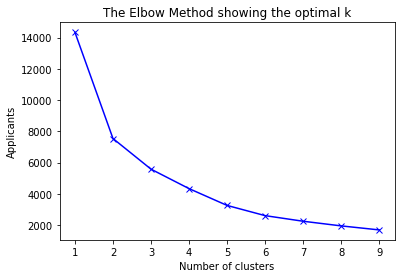

<Figure size 576x576 with 0 Axes>

In [62]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x_pca)
    distortions.append(kmeanModel.inertia_)
plt.plot(K, distortions, 'bx-')
plt.title('The Elbow Method showing the optimal k')    
plt.xlabel('Number of clusters')
plt.ylabel('Applicants')
plt.figure(figsize=(8,8))


In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,n_init=50)
kmeans.fit(x_pca)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(labels)
print(centroids)
#y_kmeans = kmeans.predict(x_pca)

[1 1 1 ... 0 1 0]
[[ 2.58620567 -0.89898506]
 [-1.20427237 -0.0321805 ]
 [ 2.06015947  3.38892345]]


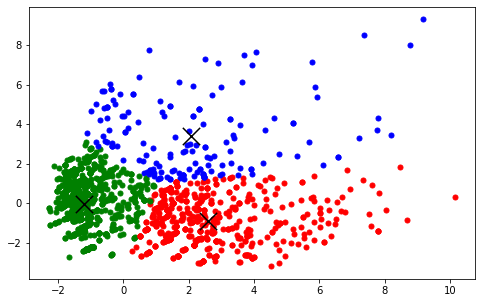

In [64]:
plt.figure(figsize=(8,5))
colors = ['r.','g.','b.','y.']
for i in range(len(x_pca)):
    #print("labels: ",labels[i])
    plt.plot(x_pca[i][0], x_pca[i][1], colors[labels[i]], markersize =10)
plt.scatter(centroids[:,0],centroids[:,1], color= 'black', marker='x',s=300, linewidths=25, zorder = 10 )

In [65]:
pd.set_option('display.max_column', 29)
features.head(1)

exp  python_yn  data_science_yn  TensorFlow_yn  PyTorch_yn  PyPI_yn  \
0    2          1                0              0           0        0   

   sklearn_yn  Statistical_yn  ML_yn  ml_yn  Deep_yn  SQL_yn  Flask_yn  \
0           0               0      0      1        0       0         0   

   AWS_yn  GCP_yn  HTML_yn  CSS_yn  Bootstrap_yn  AJAX_yn  PHP_yn  API_yn  \
0       0       0        0       0             0        0       0       0   

   Git_yn  JSON_yn  Mongo_yn  Express_yn  JS_yn  React_yn  ES6_yn  Linux_yn  
0       0        0         0           0      0         0       0         0

In [66]:
columns = features.columns
columns

Index(['exp', 'python_yn', 'data_science_yn', 'TensorFlow_yn', 'PyTorch_yn',
       'PyPI_yn', 'sklearn_yn', 'Statistical_yn', 'ML_yn', 'ml_yn', 'Deep_yn',
       'SQL_yn', 'Flask_yn', 'AWS_yn', 'GCP_yn', 'HTML_yn', 'CSS_yn',
       'Bootstrap_yn', 'AJAX_yn', 'PHP_yn', 'API_yn', 'Git_yn', 'JSON_yn',
       'Mongo_yn', 'Express_yn', 'JS_yn', 'React_yn', 'ES6_yn', 'Linux_yn'],
      dtype='object')